## ChatGPT-assisted scraping: Creating a bot to pull data from Maryland employees database

Our new friend ChatGPT: enemy of English professors, cautious friend of computer programmers and to journalists, well, something in-between. The tool has become indispensable for me and many of my colleagues in the news apps class this semester, whether it has been to rewrite entire scripts to debug one line of code or explain a concept found in one of our tutorials. 

In this blog post, I’ll show you how I utilized ChatGPT to create a semi-functional scraper for the vacancies in this Maryland state employees database. This utilization of scraping was much more a practice run than anything, as the vast majority of data on the website I was pulling from turned out to be wildly dated and inaccurate. It became harder to draw any journalistic conclusions from the data by the minute – with the exception of a snide “why hasn’t the state updated its employees database in some areas since at least 2006?” 

But overall, the process turned out to be a fun puzzle that was worth solving. And it wouldn’t have been possible without ChatGPT being there to guide me through what scraping for an admittedly hellish website could look like. I was mildly successful and had to pivot my angle for the scraper often, but hopefully this blog will help others in the future understand what ChatGPT-assisted scraping can do to help, or hurt, someone’s coding process. 

A few disclaimers before we dive in:

#### How ChatGPT should and shouldn't be used to help write code in this context

As we’ll discuss later in this post, ChatGPT can be an indispensable friend in helping folks understand single lines of code or overall templates that can be built off of to achieve a specific web scraping or programming goal. Despite this, the program’s knowledge is not absolute. 

How helpful ChatGPT can be for scraping – or any other purpose – depends almost entirely on a person’s own ability to ask smart, thoughtful questions. When I first started using ChatGPT to help me build a scraper, I did indeed make a first, half-hearted effort to give it my webpage and say “pull all of this information down! I know nothing about this webpage, but you surely will, pesky AI!” 

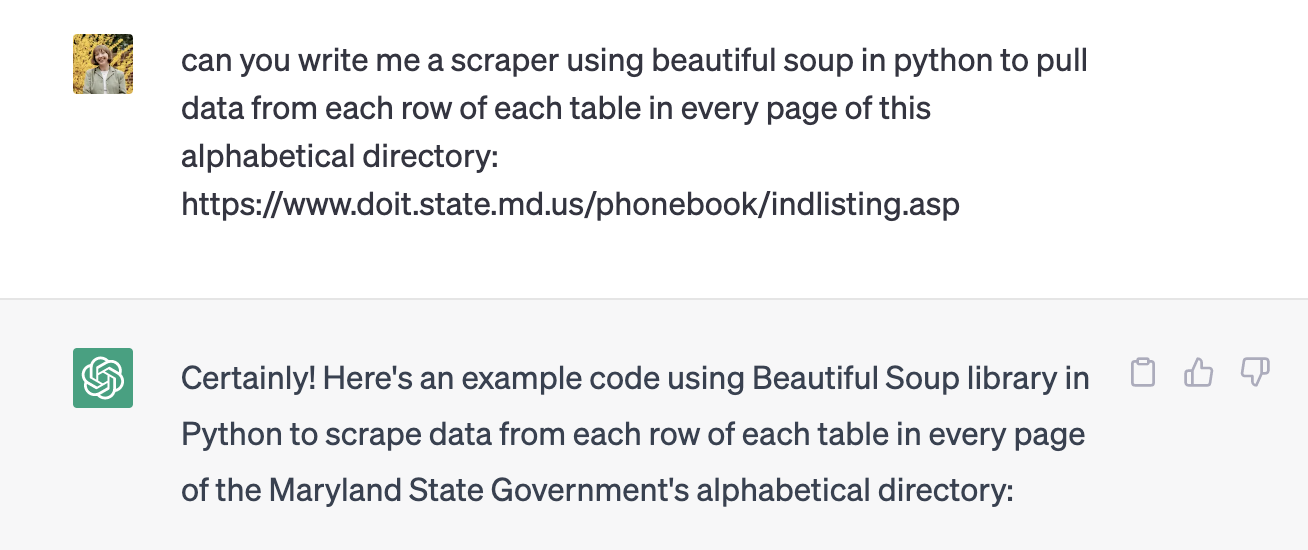

In [1]:
# And here is the code ChatGPT generated:

import requests
from bs4 import BeautifulSoup

# Define the base URL and the initial page
base_url = 'https://www.doit.state.md.us/phonebook/indlisting.asp'
page_url = base_url + '?letter=A'

# Initialize an empty list to store the data
data = []

# Loop through each page (A to Z)
for letter in range(65, 91):  # ASCII codes for A to Z
    page_url = base_url + '?letter=' + chr(letter)
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all tables on the page
    tables = soup.find_all('table')

    # Loop through each table
    for table in tables:
        # Find all rows in the table
        rows = table.find_all('tr')
        for row in rows:
            # Find all cells in the row
            cells = row.find_all('td')
            # Extract the data from each cell
            if len(cells) == 4:
                # Ignore the header row
                name = cells[0].get_text().strip()
                title = cells[1].get_text().strip()
                phone = cells[2].get_text().strip()
                email = cells[3].get_text().strip()
                # Append the data to the list
                data.append([name, title, phone, email])

# Print the data
for item in data:
    print(item)

['Chris Aadland', 'Natural Resources, Department of', 'Power Plant Assessment Division B-3', '(410)260-8736']
['Christopher Aadland', 'Natural Resources, Department of', 'Habitat Restoration', '(410)260-8736']
['David Aalders', 'Public Safety & Correctional Services, Department of', 'Eastern Correctional Institution', '(410)845-4000\xa0Ext.\xa04415']
['Bizhan Aarabi', 'University of Maryland, Baltimore', 'School of Medicine', '(410)328-7371']
['Joy Aaron', 'Maryland Department of Health', 'Maryland Board of Physical Therapy Examiners', '(410)764-4716']
['Mark C. Aaron', 'University of Maryland, Baltimore', 'School of Nursing', 'No Listing']
['Clayton Anthony Aarons', 'Judiciary of Maryland', 'District #5  - Prince George`s County (Upper Marlboro)', '(301)070/4060']
['Sean R. Abad', 'University of Maryland, Baltimore', 'Office of Development and Alumni Relations', '(410)706-8494']
['Eli Abada', 'Maryland Department of Health', 'Program Analysis & MCOs', '(410)767-1392']
['Adam Abadir', 

Obviously, that didn’t work. None of the code from that first attempt to put in zero effort on my end was usable because I did not do enough legwork to make sure ChatGPT understood the patterns and nuances of this type of scraping activity. That’s your first lesson in AI-assisted scraping: the AI technology can only be as smart as you. It only understands the data as much as you do. So put in some legwork to make sure you’re able to help it help you. 

That first scraper ChatGPT generated for me only pulled down data from one page, rather than the 100+ that I needed. So, it was back to the drawing board. 

#### Main code issues ChatGPT was super helpful in solving

If there's one thing ChatGPT is good for, it's generating templates. When our class first started this web scraping assignment and was working off a few previous scrapers we had built, I really just needed a fresh start. From my perspective, I thought it would be much easier to learn and adapt the code we have already learned to my own scraping project.

Basically, I wanted to get a sense of what elements of a scraping template belongs within *all* scrapers, regardless of what website they pulled from, versus what unique aspects were add-ons based on the needs and challenges posed by each individual website. ChatGPT sent me on my way during this process and can do similar things for other folks looking to build off a baseline template for any of their coding needs.

For example, here is the template I generated for a basic, no-frills Beautiful Soup scraper template. Even just asking ChatGPT for explanations of different lines of code within this expanded my understanding of how different elements of the scraper worked together programmatically. 

##### The template itself:

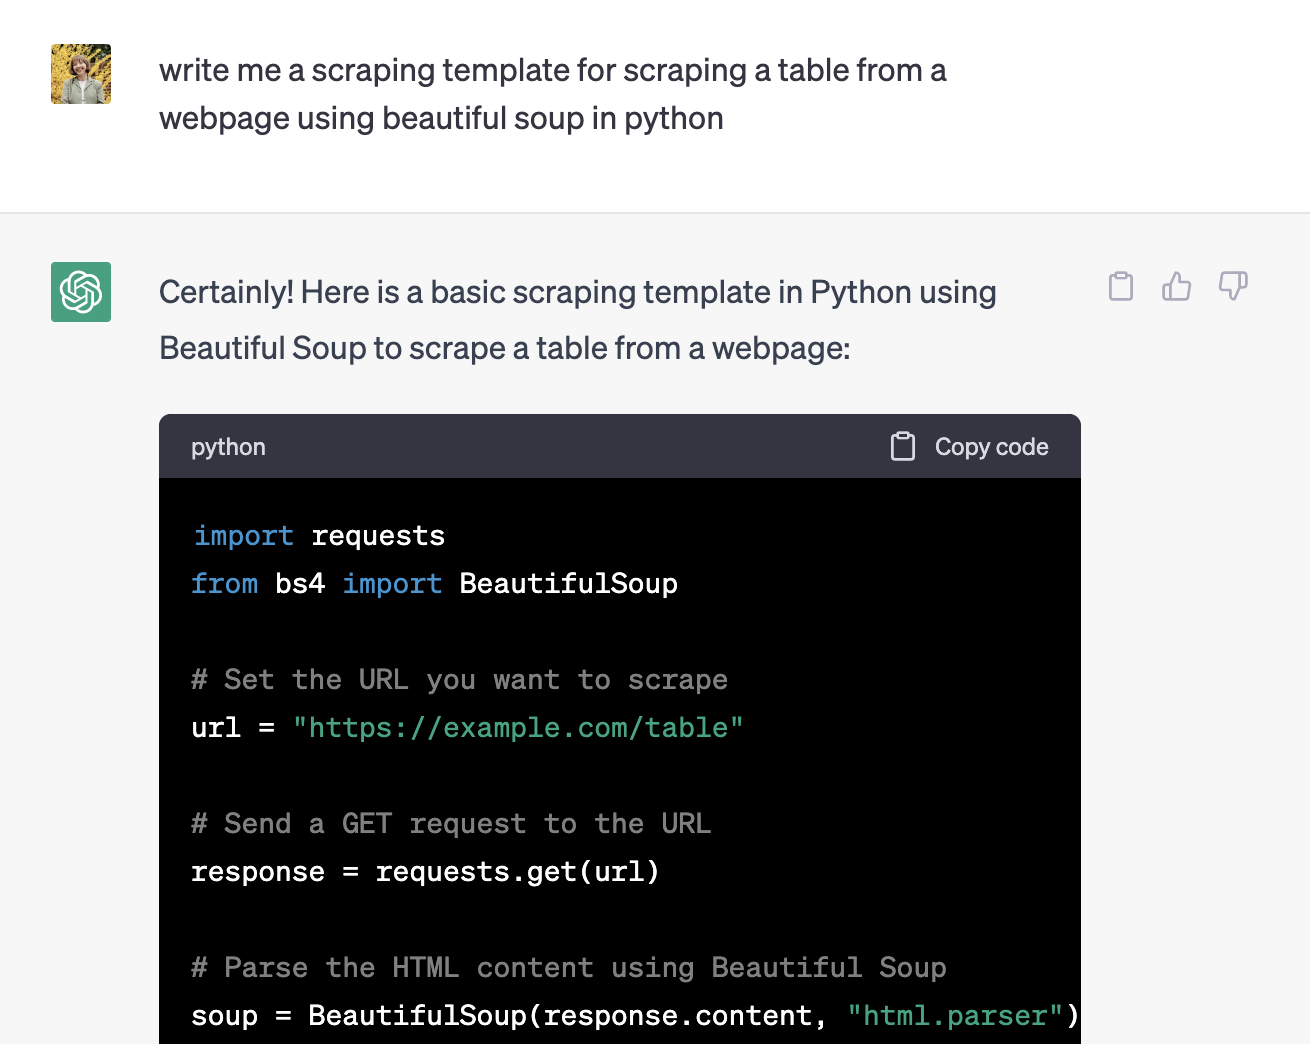



In [2]:
import requests
from bs4 import BeautifulSoup

# Set the URL you want to scrape
url = "https://example.com/table"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, "html.parser")

# Find the table element using Beautiful Soup
table = soup.find("table")

# Create a list to store the table data
table_data = []

# Find all table rows using Beautiful Soup
rows = table.find_all("tr")

# Loop through each row and extract the table data
for row in rows:
    # Find all table cells in the row
    cells = row.find_all("td")
    
    # Extract the text from each cell and append it to the table data list
    row_data = []
    for cell in cells:
        row_data.append(cell.text.strip())
    
    # Append the row data to the table data list
    table_data.append(row_data)

# Print the table data
print(table_data)

AttributeError: 'NoneType' object has no attribute 'find_all'

##### Asking a clarifiying question to better understand how certain HTML tags worked in a scraping context

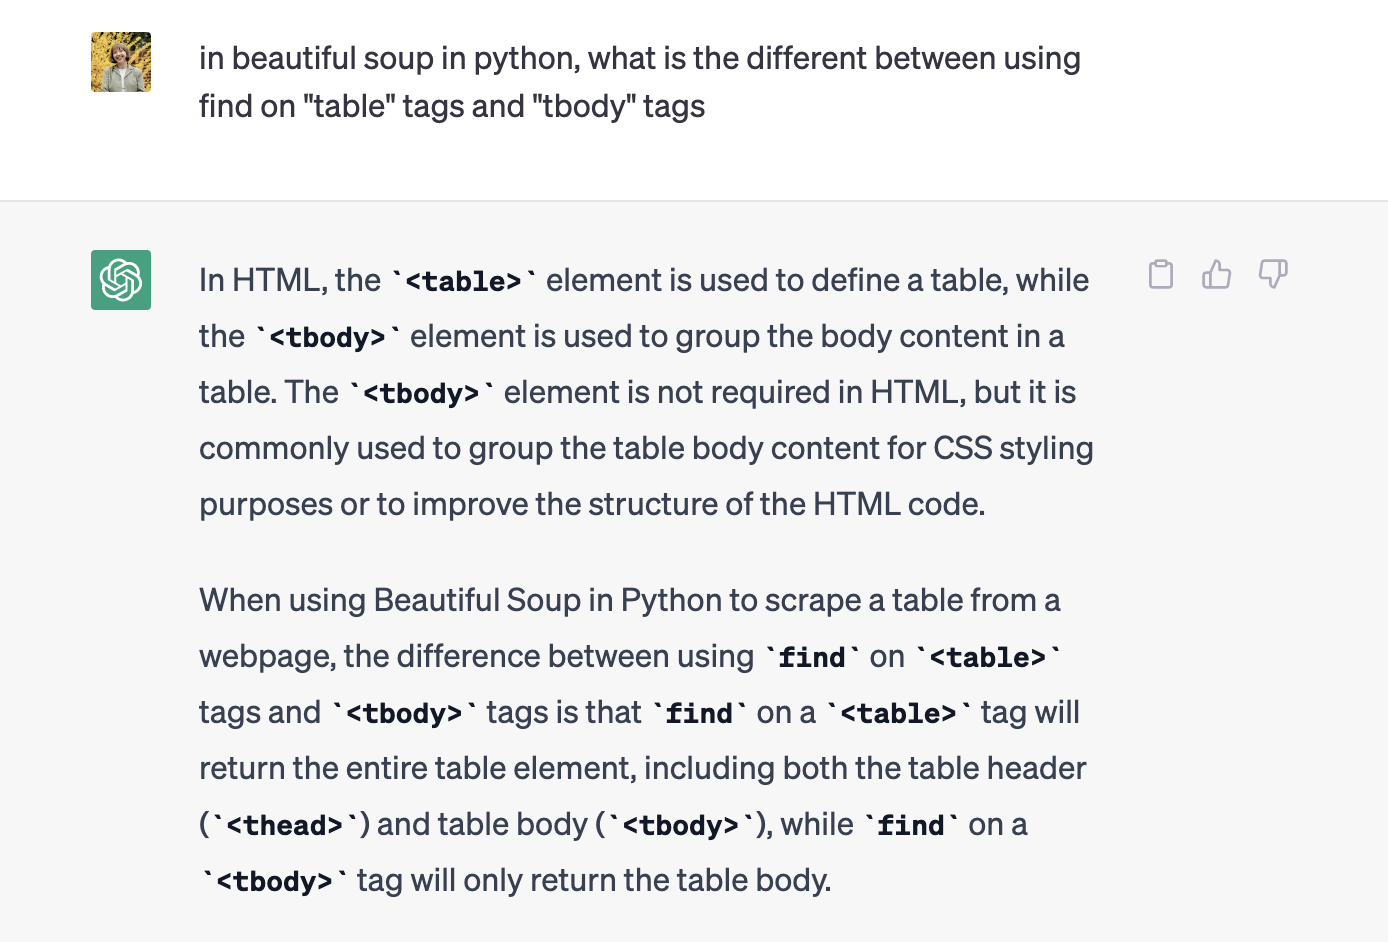

##### Updating the template based on a better understanding of my website and its limitations for just doing bare-minimum scraping

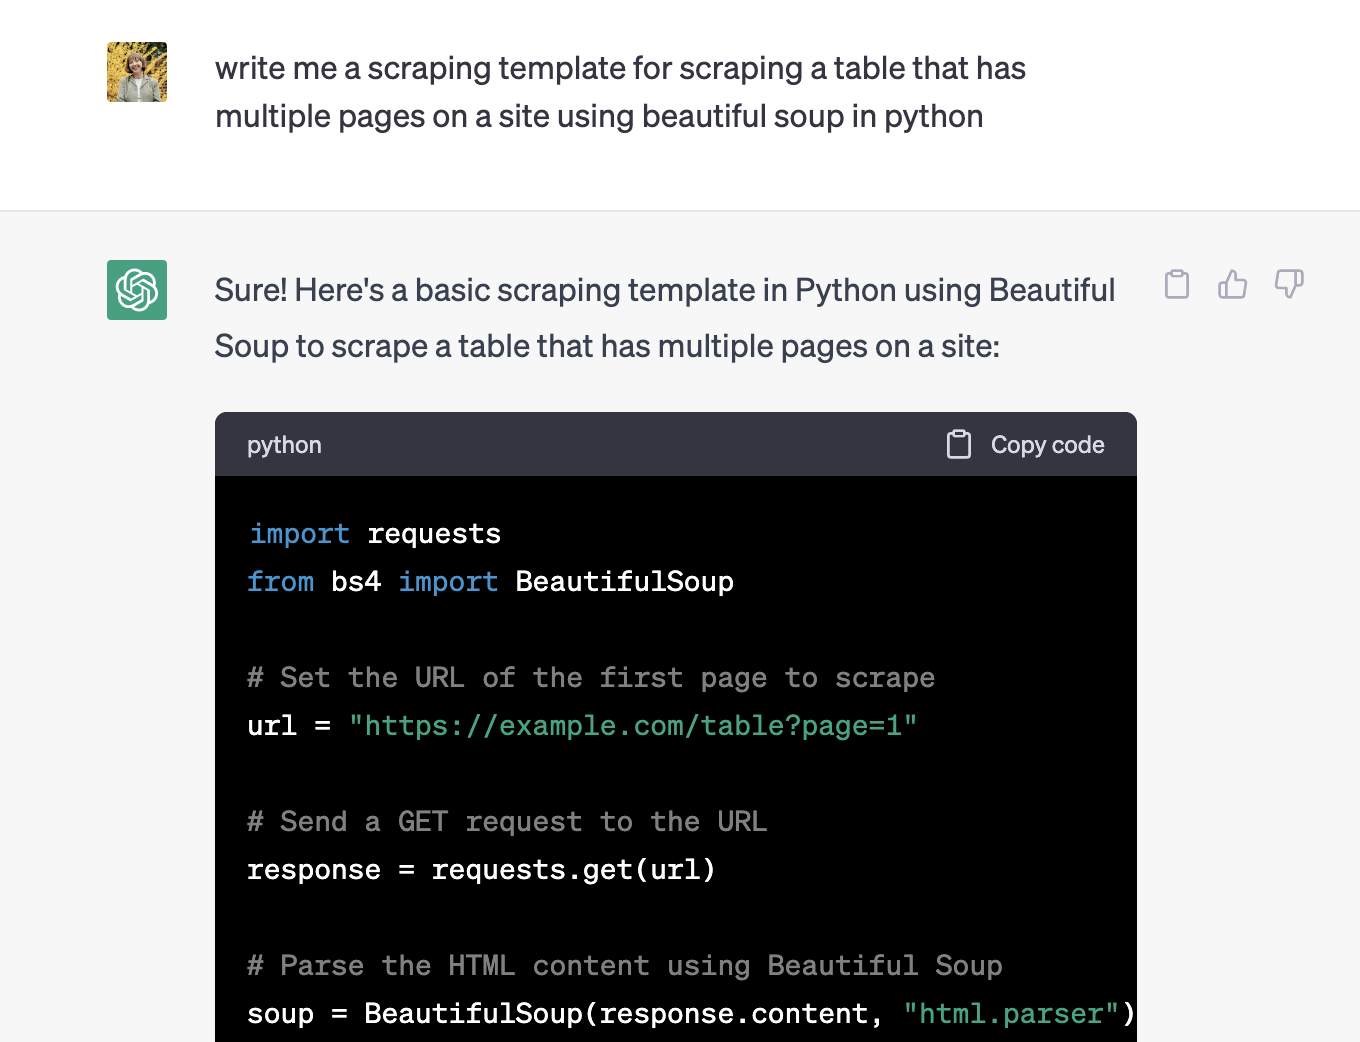

In [3]:
# and that updated scraper code to work from:

import requests
from bs4 import BeautifulSoup

# Set the URL of the first page to scrape
url = "https://example.com/table?page=1"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, "html.parser")

# Create a list to store the table data
table_data = []

# Loop through all pages of the table
page = 1
while True:
    # Find the table element using Beautiful Soup
    table = soup.find("table")
    
    # Find all table rows using Beautiful Soup
    rows = table.find_all("tr")
    
    # Loop through each row and extract the table data
    for row in rows:
        # Find all table cells in the row
        cells = row.find_all("td")
        
        # Extract the text from each cell and append it to the table data list
        row_data = []
        for cell in cells:
            row_data.append(cell.text.strip())
        
        # Append the row data to the table data list
        table_data.append(row_data)
    
    # Check if there is a next page of the table
    next_button = soup.find("a", {"class": "next-page"})
    if next_button is None:
        # Stop looping if there is no next page
        break
    
    # Set the URL of the next page to scrape
    page += 1
    url = f"https://example.com/table?page={page}"
    
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Parse the HTML content using Beautiful Soup
    soup = BeautifulSoup(response.content, "html.parser")

# Print the table data
print(table_data)

AttributeError: 'NoneType' object has no attribute 'find_all'

### Iterating through pages within the state employees vacancy directory

The main challenge I faced while scraping the Maryland state employees directory was making my scraper iterate through two different patterns on a page at once. The vacancy website was organized into groups of pages within each individual letter of the alphabet. Within each letter tab, there were anywhere from 1 to 20 pages of results containing employees whose last names began with that letter. The pages were incremented by 15 (as there were 15 employees listed on each page) so pages associated with the letter 'A' would begin with a URL of "https://www.doit.state.md.us/phonebook/IndListing.asp?FirstLetter=A&offset=0", the next page in the letter 'A' would have a url of "https://www.doit.state.md.us/phonebook/IndListing.asp?FirstLetter=A&offset=15" and so on. I wanted to iterate through each of these URLs for each individual letter until we reached their final page with the help of ChatGPT, as I knew this needed to take on some form of "for loop inside for loop inside for loop" format but had little experience putting those piece together before working on this task. 

A huge cautionary tale in ChatGPT-assisted scraping is that, no matter how many instructions you give it to do otherwise, ChatGPT is quite stubborn in how it feels something should get done. When I asked ChatGPT for help with this iterating task, I tried to specify as much as possible how to complete it – specifying the tool needed to use URLs that are incremented by 15 and move onto the next multiple of 15 once it was done with a given page. Then, once it reached the last page in a given letter, it needed to iterate into the next letter and repeat the process. As we will see in the following examples, the AI wanted to only determine iteration through the last page of a given letter based on looking for an HTML button tag tht signified the last page.

The only issue was that there was no HTML button tag that existed for these webpages. Each "next" URL was associated by a small image of an arrow and a new href associated with it. See the following examples to understand more about ChatGPT's roundabout way of attempting to help me.

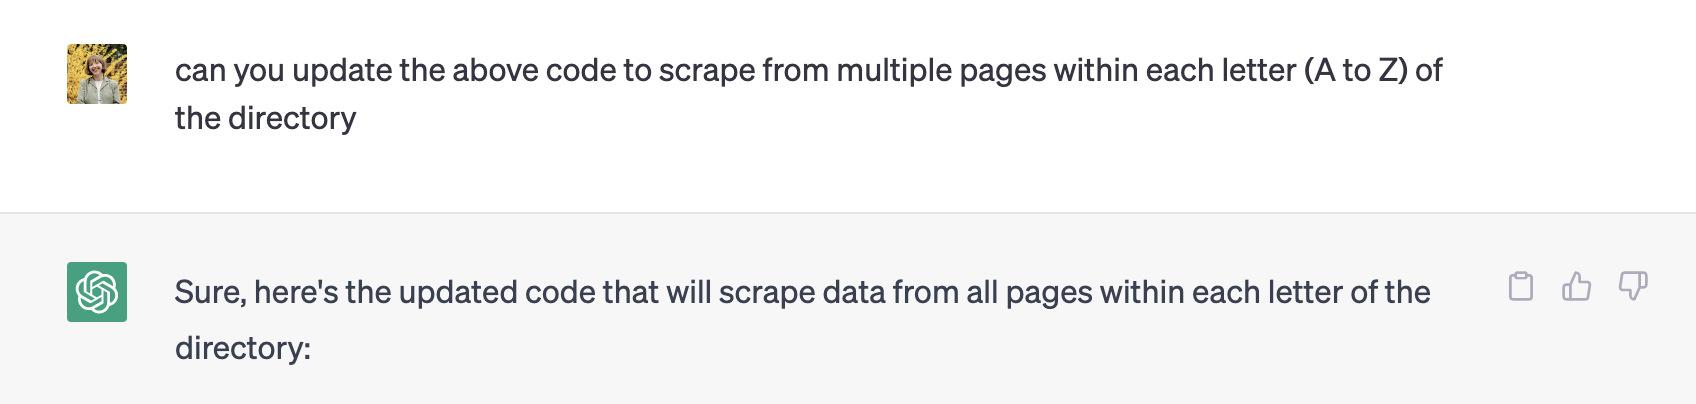


In [4]:
##### ChatGPT's initial code for iterating through each letter in an alphabet:

import requests
from bs4 import BeautifulSoup

# Define the base URL
base_url = 'https://www.doit.state.md.us/phonebook/indlisting.asp'

# Initialize an empty list to store the data
data = []

# Loop through each page (A to Z)
for letter in range(65, 91):  # ASCII codes for A to Z
    page_url = base_url + '?letter=' + chr(letter)
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the pagination links on the page
    pagination = soup.find('div', {'class': 'pagination'})
    if pagination is not None:
        links = pagination.find_all('a')
        num_pages = len(links) + 1
    else:
        num_pages = 1

    # Loop through each page
    for page in range(1, num_pages + 1):
        # Construct the URL for the page
        if page == 1:
            page_url = base_url + '?letter=' + chr(letter)
        else:
            page_url = base_url + '?letter=' + chr(letter) + '&page=' + str(page)
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all tables on the page
        tables = soup.find_all('table')

        # Loop through each table
        for table in tables:
            # Find all rows in the table
            rows = table.find_all('tr')
            for row in rows:
                # Find all cells in the row
                cells = row.find_all('td')
                # Extract the data from each cell
                if len(cells) == 4:
                    # Ignore the header row
                    name = cells[0].get_text().strip()
                    title = cells[1].get_text().strip()
                    phone = cells[2].get_text().strip()
                    email = cells[3].get_text().strip()
                    # Append the data to the list
                    data.append([name, title, phone, email])

# Print the data
for item in data:
    print(item)

['Chris Aadland', 'Natural Resources, Department of', 'Power Plant Assessment Division B-3', '(410)260-8736']
['Christopher Aadland', 'Natural Resources, Department of', 'Habitat Restoration', '(410)260-8736']
['David Aalders', 'Public Safety & Correctional Services, Department of', 'Eastern Correctional Institution', '(410)845-4000\xa0Ext.\xa04415']
['Bizhan Aarabi', 'University of Maryland, Baltimore', 'School of Medicine', '(410)328-7371']
['Joy Aaron', 'Maryland Department of Health', 'Maryland Board of Physical Therapy Examiners', '(410)764-4716']
['Mark C. Aaron', 'University of Maryland, Baltimore', 'School of Nursing', 'No Listing']
['Clayton Anthony Aarons', 'Judiciary of Maryland', 'District #5  - Prince George`s County (Upper Marlboro)', '(301)070/4060']
['Sean R. Abad', 'University of Maryland, Baltimore', 'Office of Development and Alumni Relations', '(410)706-8494']
['Eli Abada', 'Maryland Department of Health', 'Program Analysis & MCOs', '(410)767-1392']
['Adam Abadir', 

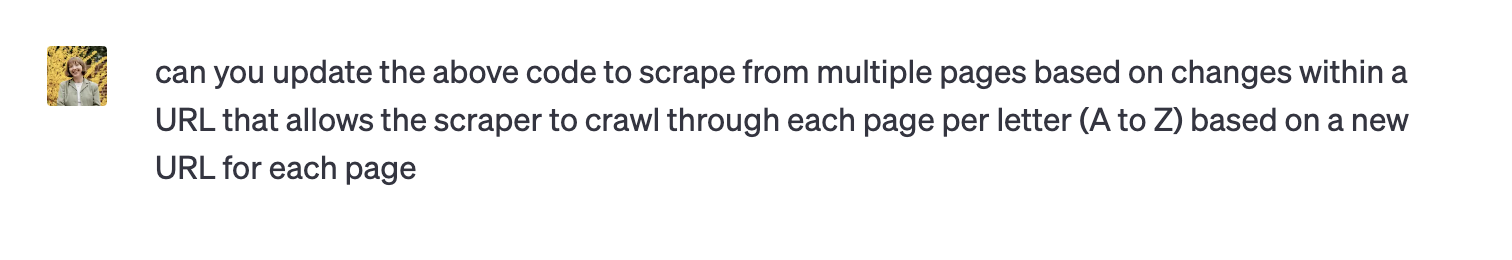


In [5]:
import requests
from bs4 import BeautifulSoup

# Define the base URL
base_url = 'https://www.doit.state.md.us/phonebook/indlisting.asp'

# Initialize an empty list to store the data
data = []

# Loop through each page (A to Z)
for letter in range(65, 91):  # ASCII codes for A to Z
    # Initialize the page number
    page_num = 1
    # Construct the initial URL
    url = f'{base_url}?letter={chr(letter)}&page={page_num}'
    while True:
        # Send a request to the URL
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all tables on the page
        tables = soup.find_all('table')

        # Loop through each table
        for table in tables:
            # Find all rows in the table
            rows = table.find_all('tr')
            for row in rows:
                # Find all cells in the row
                cells = row.find_all('td')
                # Extract the data from each cell
                if len(cells) == 4:
                    # Ignore the header row
                    name = cells[0].get_text().strip()
                    title = cells[1].get_text().strip()
                    phone = cells[2].get_text().strip()
                    email = cells[3].get_text().strip()
                    # Append the data to the list
                    data.append([name, title, phone, email])

        # Check if there is a "Next" link
        next_link = soup.find('a', {'title': 'Next'})
        if next_link is not None:
            # Increment the page number and construct the new URL
            page_num += 1
            url = f'{base_url}?letter={chr(letter)}&page={page_num}'
        else:
            # No more pages, break out of the loop
            break

# Print the data
for item in data:
    print(item)

['Chris Aadland', 'Natural Resources, Department of', 'Power Plant Assessment Division B-3', '(410)260-8736']
['Christopher Aadland', 'Natural Resources, Department of', 'Habitat Restoration', '(410)260-8736']
['David Aalders', 'Public Safety & Correctional Services, Department of', 'Eastern Correctional Institution', '(410)845-4000\xa0Ext.\xa04415']
['Bizhan Aarabi', 'University of Maryland, Baltimore', 'School of Medicine', '(410)328-7371']
['Joy Aaron', 'Maryland Department of Health', 'Maryland Board of Physical Therapy Examiners', '(410)764-4716']
['Mark C. Aaron', 'University of Maryland, Baltimore', 'School of Nursing', 'No Listing']
['Clayton Anthony Aarons', 'Judiciary of Maryland', 'District #5  - Prince George`s County (Upper Marlboro)', '(301)070/4060']
['Sean R. Abad', 'University of Maryland, Baltimore', 'Office of Development and Alumni Relations', '(410)706-8494']
['Eli Abada', 'Maryland Department of Health', 'Program Analysis & MCOs', '(410)767-1392']
['Adam Abadir', 

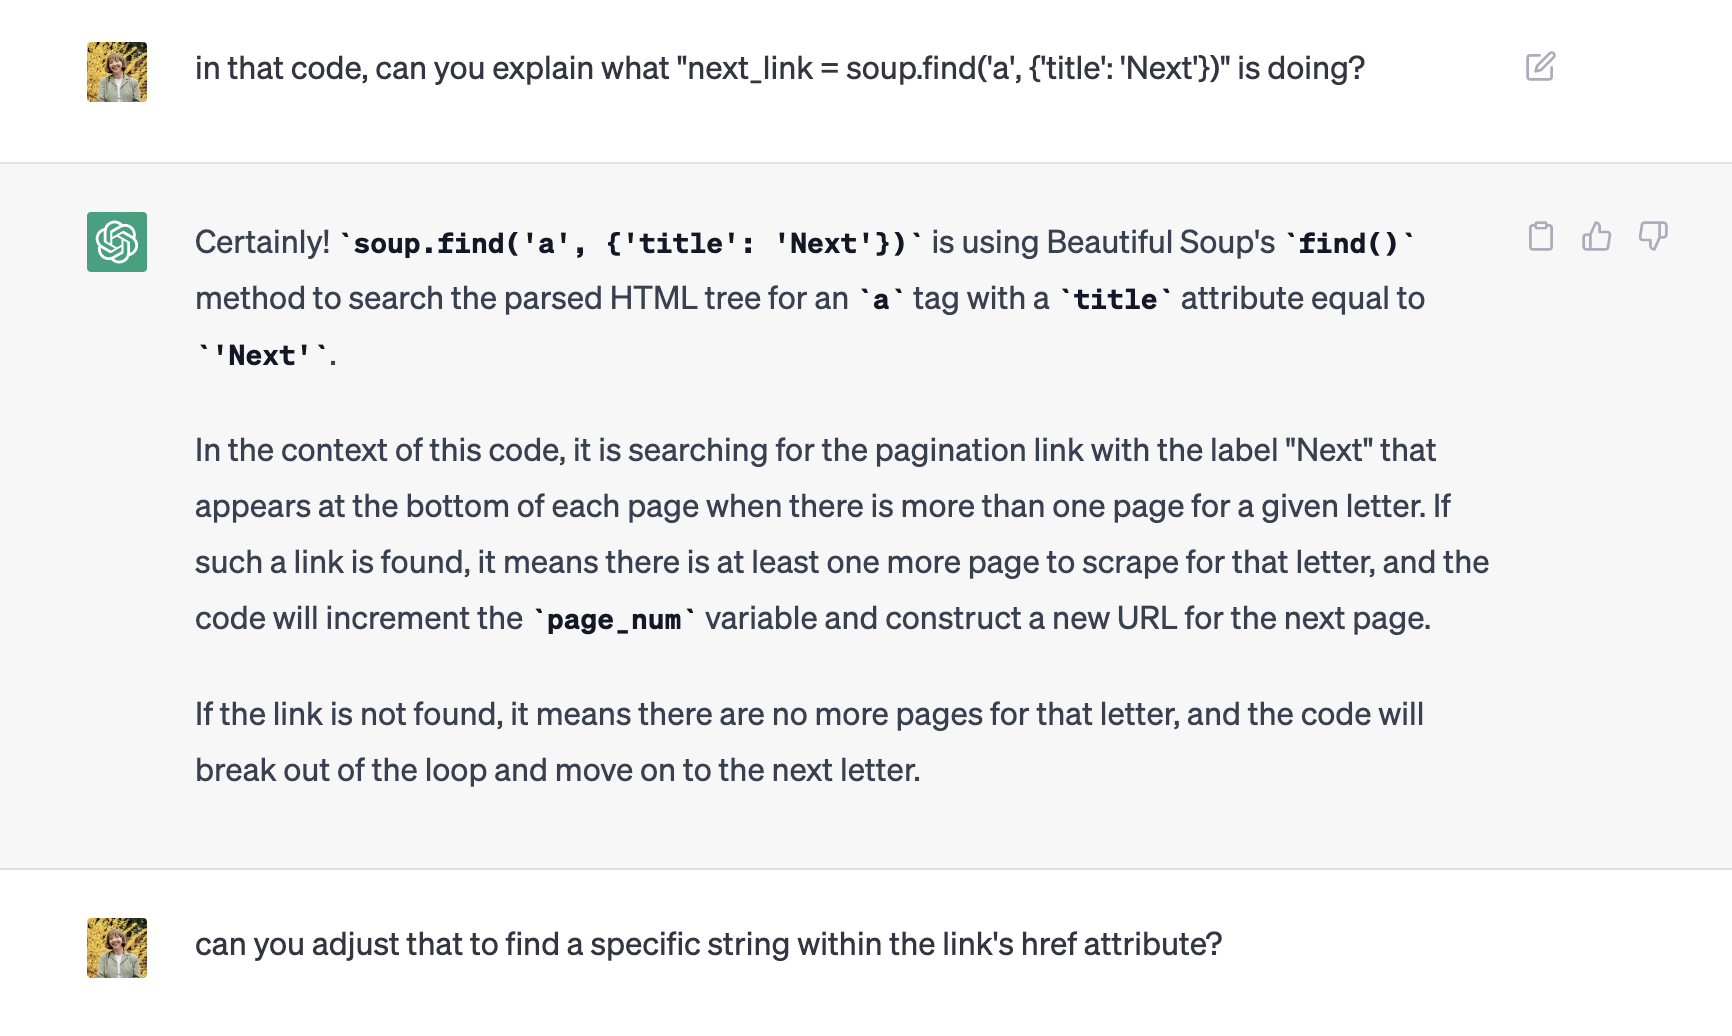

Here is where ChatGPT's little antics started to get frustrating. No matter how many instructions I gave it to iterate over specific links, the code it kept generating tried to find "next" attributes in the HTML on the page to iterate through. All of the above code blocks, despite having differences in how they are structured, effectively return the same results and provide only the smallest subsect of data from the site after running them as a scraper. Frustrating, right?

This process continued for quite a while, involving a long back-and-forth between ChatGPT and I. During the process, my main strategy for understanding how the AI was implementing my suggestions was asking for explanations whenever I saw it had added a new line of code and telling it to adjust that line depending on if it was the proper strategy to use. 

Later in this process, I attempted to adapt the general vibe of ChatGPT's above code into a usable format where I could have a separate scraping system for each individual letter and then append the values from each letter onto a list once each had been accumulated. ChatGPT was helpful in getting me to this point, as the baseline structure of how the page-by-page scraper was formatted was easily repurposable to try and make things work on a micro-scale. Here's that code that I started with for trying to bring down each individual letter:

In [14]:
while page <= 870:
    a_list = []
    url = f"https://www.doit.state.md.us/phonebook/IndListing.asp?FirstLetter=A&offset={page}"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, features="html.parser")
    table = soup.find('table')
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if len(cells) == 4:
            employee_name = cells[0].get_text().strip()
            agency_name = cells[1].get_text().strip()
            office = cells[2].get_text().strip()
            phone = cells[3].get_text().strip()
            a_list.append(
                [employee_name, agency_name, office, phone])
    page = page + 15
    print(a_list)

    # B
while page <= 2010:
    b_list = []
    url = f"https://www.doit.state.md.us/phonebook/IndListing.asp?FirstLetter=B&offset={page}"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, features="html.parser")
    table = soup.find('table')
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if len(cells) == 4:
            employee_name = cells[0].get_text().strip()
            agency_name = cells[1].get_text().strip()
            office = cells[2].get_text().strip()
            phone = cells[3].get_text().strip()
            b_list.append(
                [employee_name, agency_name, office, phone])
    page = page + 15

This solution was also far from the best, but the groundwork for figuring out how different scraping methods might get me closer to my end goal. 

The main takeaway from troubleshooting difficult code with ChatGPT's help: sometimes even AI isn't able to help you with convoluted, poorly structured webpages. I had no idea going into this process that it would be relatively difficult to adjust the way ChatGPT was contextualizing and thinking about a problem through the resources it had available to pull. It could be possible that ChatGPT didn't have a concrete example in its back pocket for iterating through every page within every letter of a given webpage. I mean, it surely stumped me, so it may not be super far off for this complex issue to stump a super-powered AI, despite that conclusion being unexpected at the start of this process.

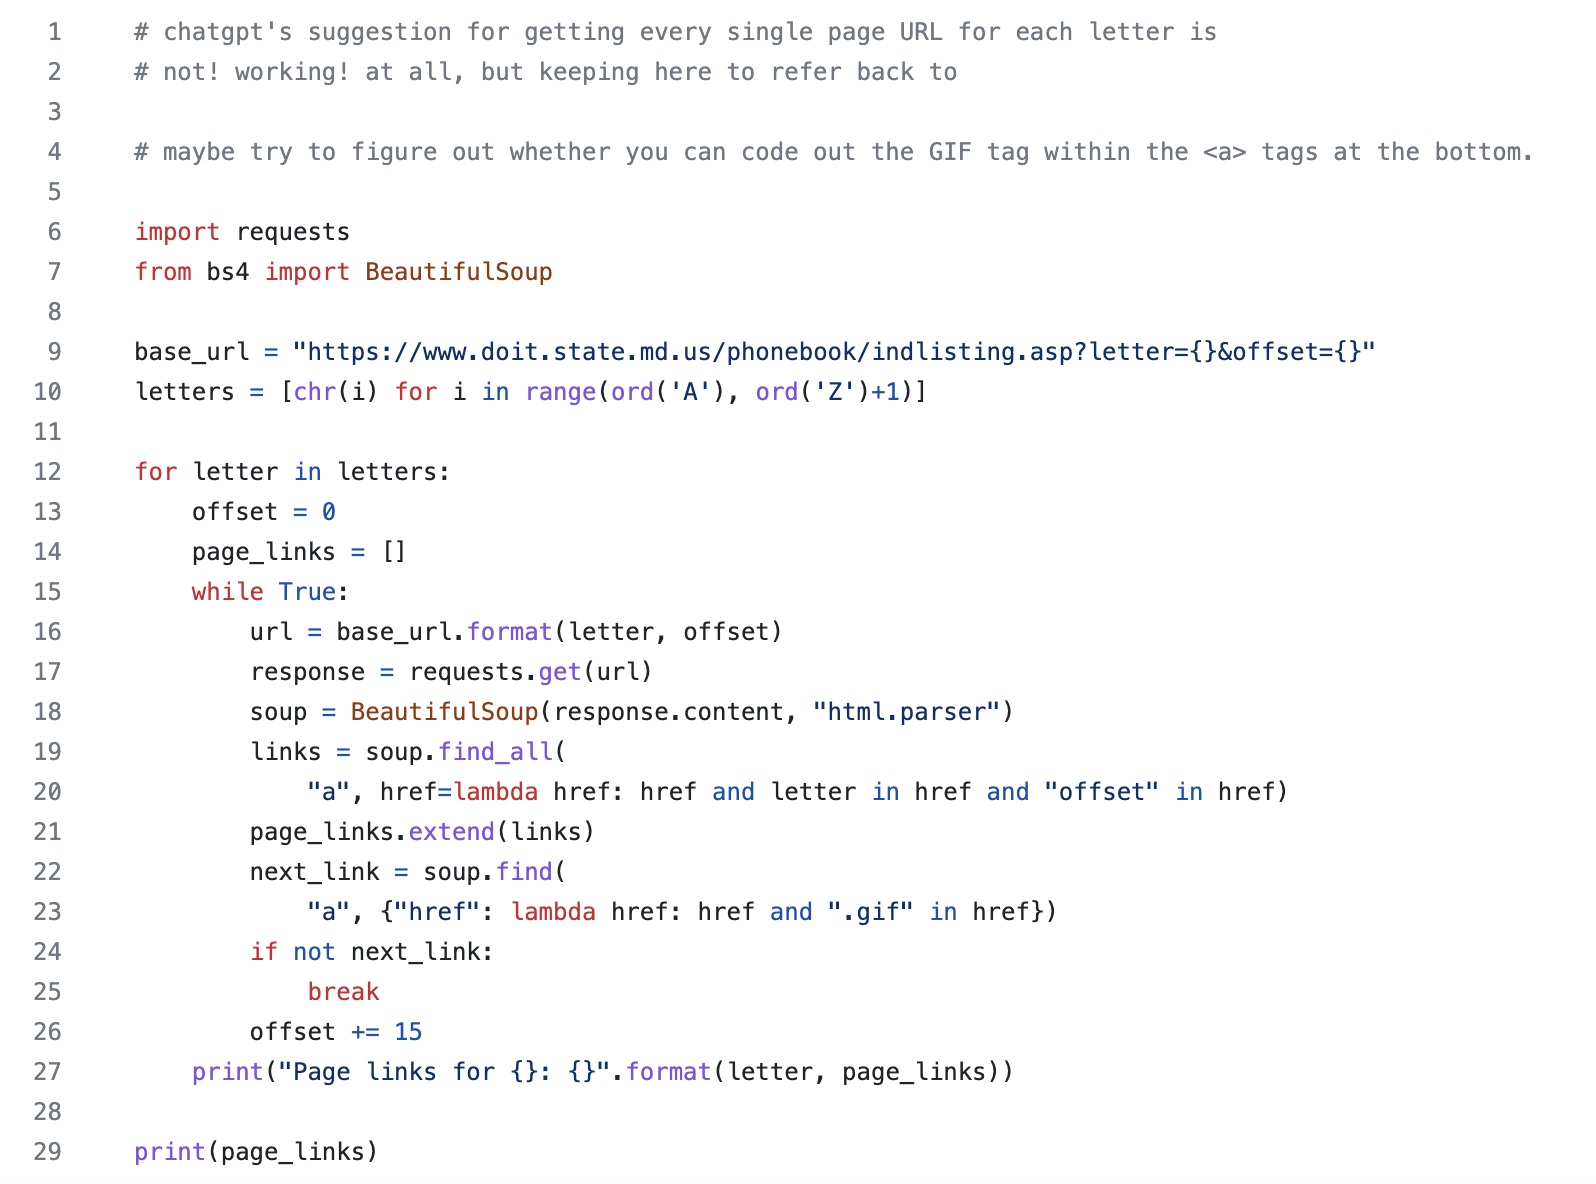

##### You can even see my frustration with ChatGPT's methods in one of the 1000 Python files I saved to my repository during this project named "chatgpt_troubleshooting.py" or another similar title. If I revisted this process again with clearer eyes and a less impending deadline, I'm sure I could repurpose the suggestions ChatGPT provided into something workable, but shapeshifting ChatGPT code into a more structured format is far from the best use of time when an assignment deadline is approaching, so I cut my losses and made the scope of my scraper much, much smaller.

I continued to troubleshoot my scraper using ChatGPT, but pivoted my angle a bit to make the problems I addressed using ChatGPT a bit more cut-and-dry and straightforward. I think the way I was conducting my queries for ChatGPT when trying to understand my iteration problem was causing both me and the AI system to chase our tails a bit. 

This is a key element of learning how ChatGPT can be helpful in solving coding-related issues. I definitely chose a website that proved more difficult to scrape than I initially expected because of all of its strange little quirks on each individual page and within its URLs. For the rest of my project, I decided to (1) lower my expectations for the kind of scraper I thought I could build with the time we had allotted for it in class and (2) lower my expectations of what ChatGPT could bend over backward to help me achieve. 

#### Structured Messages for ChatGPT

